# Credit Card Default Model: Classification Analysis:
# Random Forest, Extra Tree, Gradient Boosting, XGBoost 

### The original source of this code is from "Introduction to Data Science Project Report: Part C: Machine Learning and Classification Problem" by K. Jaiswal, V. Katiyar, A. Goel, and N. Agarwal.  We modify the code for our teaching purpose.


### About the Dataset
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

We used the [**Credit Card Default payment in Taiwan**]
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to **predict whether the credit card holders are defaulters or Non-defaulters**. The Dataset and its attributes are described below



1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

# Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


# Step 2: Importing Data

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('UCI_Credit_Card.csv', header=0, index_col=0, parse_dates=False)
#dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [3]:
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [5]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Step 3: Data Cleaning

**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**


In [7]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [8]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [9]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
print(dataset.PAY_1.value_counts())

fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
print(dataset.PAY_2.value_counts())

fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
print(dataset.PAY_3.value_counts())

fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
print(dataset.PAY_4.value_counts())

fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
print(dataset.PAY_5.value_counts())

fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
print(dataset.PAY_6.value_counts())


0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [11]:
dataset.columns = dataset.columns.map(str.lower)

In [12]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Step 4: Spiliting Dataset into Train (70%) and Test Set (30%)

In [13]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Step 5: Applying Ensemble Methods for Classification Problem

## 5.1 Random Forest Classifier

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [14]:
rfc = RandomForestClassifier(random_state=1)

In [15]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)  # predicted class label
y_prob = rfc.predict_proba(X_test)[:, 1]   #predicted probability

In [16]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_rfc = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_rfc

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.814889,0.650995,0.36,0.463619,0.759936


## 5.2 Extra Trees Classifier


In [17]:
etc = ExtraTreesClassifier(random_state=1)

In [18]:
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)  # predicted class label
y_prob = etc.predict_proba(X_test)[:, 1]   #predicted probability

In [19]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_etc = pd.DataFrame([['Extra Trees Classifier', acc,prec,rec, f1,roc]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_rfc, results_etc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.814889,0.650995,0.3600,0.463619,0.759936
1,Extra Trees Classifier,0.805889,0.608584,0.3545,0.448025,0.749128


   ## 5.3 Gradient Boosting Classifier 

In [20]:
# Pipeline
# Steps
steps_gb = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
            ('gboost', GradientBoostingClassifier(random_state=1))
           ]

pl_gb = Pipeline(steps_gb)

In [21]:
pl_gb.fit(X_train,y_train)
y_pred = pl_gb.predict(X_test)  # predicted class label
y_prob = pl_gb.predict_proba(X_test)[:, 1]   #predicted probability

In [22]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_gb = pd.DataFrame([['Gradient Boosting', acc,prec,rec, f1,roc]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_rfc, results_etc, results_gb], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.814889,0.650995,0.3600,0.463619,0.759936
1,Extra Trees Classifier,0.805889,0.608584,0.3545,0.448025,0.749128
2,Gradient Boosting,0.819222,0.676443,0.3575,0.467779,0.779270


## 5.4 XGBOOST Classifier

In [23]:
# Pipeline
# Steps
steps_xgb = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('xgboost', XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=1))
             ]

pl_xgb = Pipeline(steps_xgb)

In [24]:
pl_xgb.fit(X_train,y_train)
y_pred = pl_xgb.predict(X_test)  # predicted class label
y_prob = pl_xgb.predict_proba(X_test)[:, 1]   #predicted probability

In [25]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_xgb = pd.DataFrame([['XGBoost', acc,prec,rec, f1,roc]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_rfc, results_etc, results_gb, results_xgb], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.814889,0.650995,0.3600,0.463619,0.759936
1,Extra Trees Classifier,0.805889,0.608584,0.3545,0.448025,0.749128
2,Gradient Boosting,0.819222,0.676443,0.3575,0.467779,0.779270
3,XGBoost,0.815333,0.657356,0.3530,0.459336,0.762192


# Step 6: Model Optimization for Hyperparameters using Randomized Search and K-Fold Cross Validation

## 6.1) Randomized Search on Random Forest Classifier

In [26]:
hyperparameters_rfc = {'n_estimators':[100, 200, 300],
                       'max_depth':[2,4,6,8,10]
                      }


In [27]:
# Create randomized search 
rs_rfc = RandomizedSearchCV(estimator = rfc,
                            param_distributions = hyperparameters_rfc,
                            n_iter = 10,
                            cv = 10,
                            random_state=1,
                            scoring = 'accuracy',
                            verbose = 0, 
                            n_jobs = -1)


In [28]:
# Fit grid search
tuned_model_rfc = rs_rfc.fit(X_train, y_train)

In [29]:
best_accuracy = tuned_model_rfc.best_score_
print('Accuracy on Cross Validation set :', best_accuracy)

Accuracy on Cross Validation set : 0.8206190476190475


In [30]:
best_parameters = tuned_model_rfc.best_params_
best_parameters

{'n_estimators': 200, 'max_depth': 8}

In [31]:
y_pred_rfc = tuned_model_rfc.predict(X_test)
y_prob_rfc = tuned_model_rfc.predict_proba(X_test)[:, 1]

In [32]:
acc = accuracy_score(y_test, y_pred_rfc)
prec = precision_score(y_test, y_pred_rfc)
rec = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
roc=roc_auc_score(y_test, y_prob_rfc)

results_rfc_rs = pd.DataFrame([['Random Forecast', acc,prec,rec, f1,roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_rfc_rs

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forecast,0.817333,0.678715,0.338,0.451268,0.778358


## 6.2) Randomized Search on Extra Tree Classifier

In [33]:
hyperparameters_etc = {'n_estimators':[100, 200, 300],
                       'max_depth':[2,4,6,8,10]
                      }


In [34]:
# Create randomized search 
rs_etc = RandomizedSearchCV(estimator = etc,
                            param_distributions = hyperparameters_etc,
                            n_iter = 10,
                            cv = 10,
                            random_state=1,
                            scoring = 'accuracy',
                            verbose = 0, 
                            n_jobs = -1)


In [35]:
# Fit grid search
tuned_model_etc = rs_etc.fit(X_train, y_train)

In [36]:
best_accuracy = tuned_model_etc.best_score_
print('Accuracy on Cross Validation set :', best_accuracy)

Accuracy on Cross Validation set : 0.8139999999999998


In [37]:
best_parameters = tuned_model_etc.best_params_
best_parameters

{'n_estimators': 300, 'max_depth': 10}

In [38]:
y_pred_etc = tuned_model_etc.predict(X_test)
y_prob_etc = tuned_model_etc.predict_proba(X_test)[:, 1]

In [39]:
acc = accuracy_score(y_test, y_pred_etc)
prec = precision_score(y_test, y_pred_etc)
rec = recall_score(y_test, y_pred_etc)
f1 = f1_score(y_test, y_pred_etc)
roc=roc_auc_score(y_test, y_prob_etc)

results_etc_rs = pd.DataFrame([['Extra Trees Classifier', acc,prec,rec, f1,roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


pd.concat([results_rfc_rs, results_etc_rs], axis=0, ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forecast,0.817333,0.678715,0.338,0.451268,0.778358
1,Extra Trees Classifier,0.810667,0.678744,0.281,0.397454,0.771842


## 6. 3) Randomized Search on Gradient Boosting Classifier

In [40]:
n_estimators = [100, 200, 300]


In [41]:
# Create hyperparameter options
hyperparameters_gb = {'gboost__n_estimators': n_estimators,
                     }

In [42]:
# Create randomized search 
rs_gb = RandomizedSearchCV(estimator = pl_gb,
                            param_distributions = hyperparameters_gb,
                            n_iter = 10,
                            cv = 10,
                            random_state=1,
                            scoring = 'accuracy',
                            verbose = 0, 
                            n_jobs = -1)


In [43]:
# Fit grid search
tuned_model_gb = rs_gb.fit(X_train, y_train)

In [44]:
best_accuracy = tuned_model_gb.best_score_
print('Accuracy on Cross Validation set :', best_accuracy)

Accuracy on Cross Validation set : 0.8220000000000001


In [45]:
best_parameters = tuned_model_gb.best_params_
best_parameters

{'gboost__n_estimators': 100}

In [46]:
y_pred_gb = tuned_model_gb.predict(X_test)
y_prob_gb = tuned_model_gb.predict_proba(X_test)[:, 1]

In [47]:
acc = accuracy_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
roc=roc_auc_score(y_test, y_prob_gb)

results_gb_rs = pd.DataFrame([['Gradient Boosting', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_rfc_rs, results_etc_rs, results_gb_rs], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forecast,0.817333,0.678715,0.3380,0.451268,0.778358
1,Extra Trees Classifier,0.810667,0.678744,0.2810,0.397454,0.771842
2,Gradient Boosting,0.819222,0.676443,0.3575,0.467779,0.779270


## 6. 4) Randomized Search on XGBoost Classifier

In [48]:
n_estimators = [100]

#Regularization parameters
reg_alpha = [1, 10, 100, 1000]
reg_lambda = [0]


In [49]:
# Create hyperparameter options
hyperparameters_xgb = {'xgboost__n_estimators': n_estimators,
                       'xgboost__reg_alpha': reg_alpha,
                       'xgboost__reg_lambda': reg_lambda
                      }

In [50]:
# Create randomized search 
rs_xgb = RandomizedSearchCV(estimator = pl_xgb,
                            param_distributions = hyperparameters_xgb,
                            n_iter = 10,
                            cv = 10,
                            random_state=1,
                            scoring = 'accuracy',
                            verbose = 0, 
                            n_jobs = -1)


In [51]:
# Fit grid search
tuned_model_xgb = rs_xgb.fit(X_train, y_train)

In [52]:
best_accuracy = tuned_model_xgb.best_score_
print('Accuracy on Cross Validation set :', best_accuracy)

Accuracy on Cross Validation set : 0.8226190476190476


In [53]:
best_parameters = tuned_model_xgb.best_params_
best_parameters

{'xgboost__reg_lambda': 0,
 'xgboost__reg_alpha': 100,
 'xgboost__n_estimators': 100}

In [54]:
y_pred_xgb = tuned_model_xgb.predict(X_test)
y_prob_xgb = tuned_model_xgb.predict_proba(X_test)[:, 1]

In [55]:
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_prob_xgb)

results_xgb_rs = pd.DataFrame([['XGBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_rfc_rs, results_etc_rs, results_gb_rs, results_xgb_rs], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forecast,0.817333,0.678715,0.3380,0.451268,0.778358
1,Extra Trees Classifier,0.810667,0.678744,0.2810,0.397454,0.771842
2,Gradient Boosting,0.819222,0.676443,0.3575,0.467779,0.779270
3,XGBoost,0.820667,0.685221,0.3570,0.469428,0.778279


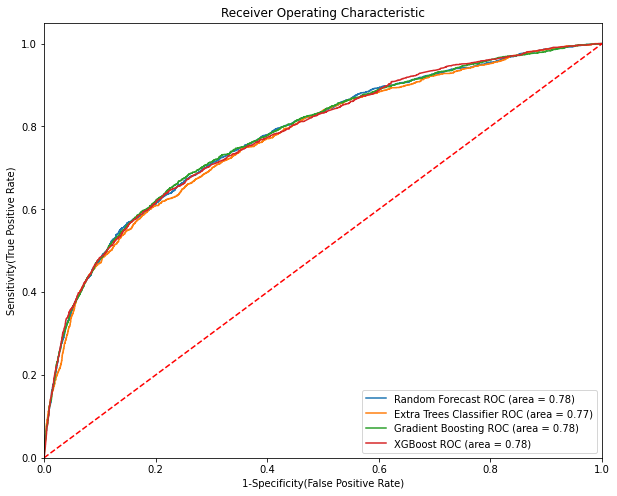

In [56]:
model = [tuned_model_rfc, tuned_model_etc, tuned_model_gb, tuned_model_xgb]

models=[y_prob_rfc, y_prob_etc, y_prob_gb, y_prob_xgb]

label=['Random Forecast','Extra Trees Classifier', 'Gradient Boosting', 'XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(4)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

XGBoost and Gradinet Boosting Classifiers outperform Random Forest and Extra Tree Classifiers in terms of overall accuracy, F1 score, and ROC.